In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='G4rgsyDW5ZLnKp27JRkjPWcbS69d-TdG5uToVQWa91jz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'insurancecharges-donotdelete-pr-o3klrihqcesjkt'
object_key = 'insurance.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)

!pip install pandas scikit-learn matplotlib seaborn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df_1.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df_1.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:

df_1.fillna(df_1.mean(), inplace=True)


/tmp/wsuser/ipykernel_302/2523375546.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.fillna(df_1.mean(), inplace=True)


In [8]:
df_1.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


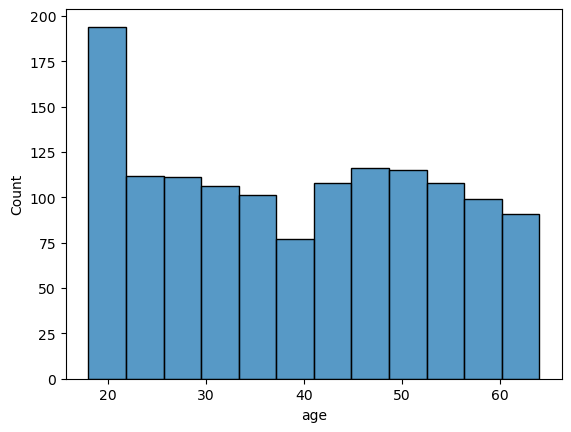

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_1['age'])  
plt.show()


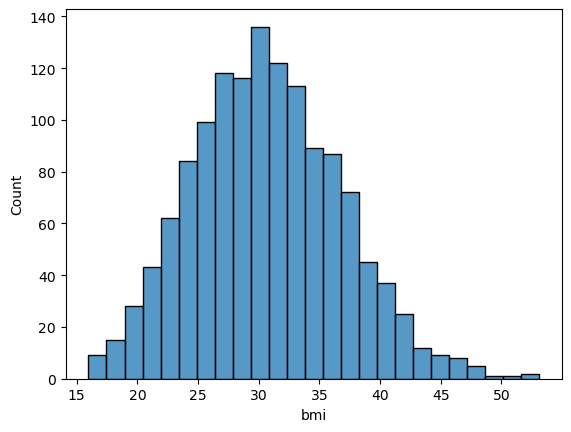

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_1['bmi'])  
plt.show()


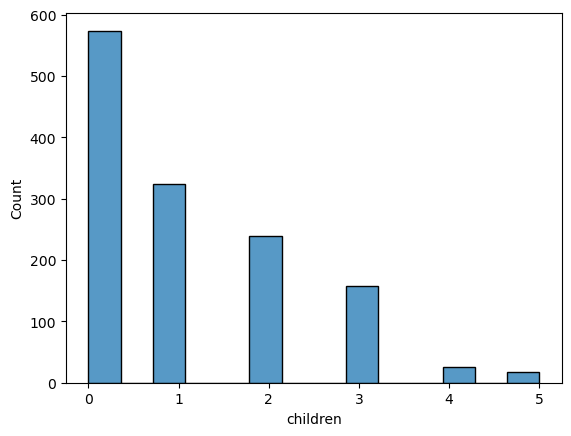

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_1['children'])  
plt.show()


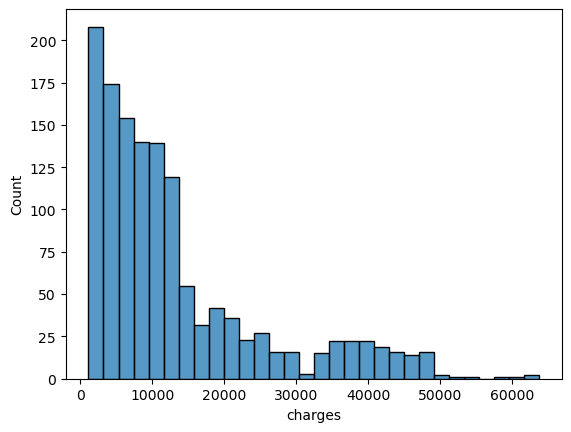

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_1['charges'])  
plt.show()


In [16]:
from sklearn.model_selection import train_test_split


X = df_1.drop('charges', axis=1)  
y = df_1['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

print(X_train.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object


In [19]:

X = df_1[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df_1['charges']


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier if it's a classification problem
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

categorical_features = ['sex', 'smoker', 'region']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())  
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


SyntaxError: '(' was never closed (592610524.py, line 12)

In [22]:
!pip install pandas scikit-learn matplotlib seaborn


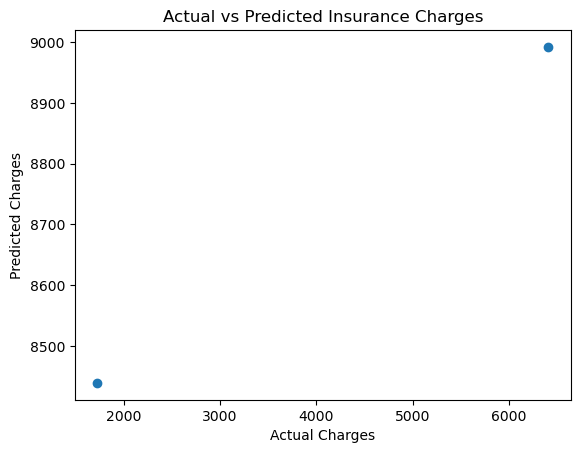

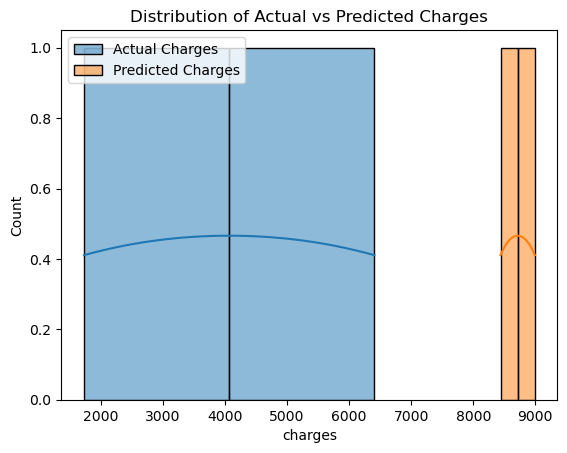

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()
sns.histplot(y_test, kde=True, label='Actual Charges')
sns.histplot(y_pred, kde=True, label='Predicted Charges')
plt.legend()
plt.title('Distribution of Actual vs Predicted Charges')
plt.show()


In [28]:

print(body.read().decode('utf-8'))


In [40]:
import io
import pandas as pd
from botocore.client import Config
import ibm_boto3
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='G4rgsyDW5ZLnKp27JRkjPWcbS69d-TdG5uToVQWa91jz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'insurancecharges-donotdelete-pr-o3klrihqcesjkt'
object_key = 'insurance.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
file_content = body.read().decode('utf-8')
file_like_object = io.StringIO(file_content)
df_1 = pd.read_csv(file_like_object)
print(df_1.head(10))


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import io
import ibm_boto3
from botocore.client import Config
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='G4rgsyDW5ZLnKp27JRkjPWcbS69d-TdG5uToVQWa91jz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'insurancecharges-donotdelete-pr-o3klrihqcesjkt'
object_key = 'insurance.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
file_content = body.read().decode('utf-8')
file_like_object = io.StringIO(file_content)
df = pd.read_csv(file_like_object)
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_charges(age, sex, bmi, children, smoker, region):
    input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
    

    for column in ['sex', 'smoker', 'region']:
        input_data[column] = label_encoders[column].transform(input_data[column])
    
    prediction = model.predict(input_data)
    return prediction[0]

Mean Absolute Error: 2533.674643617756
Mean Squared Error: 21073365.415079337
R^2 Score: 0.8642606273649586


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


df = pd.DataFrame({
    'age': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
    'sex': ['female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female'],
    'bmi': [27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33.440, 27.740, 29.830, 25.840],
    'children': [0, 1, 3, 0, 0, 0, 1, 3, 2, 0],
    'smoker': ['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
    'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest'],
    'charges': [16884.92400, 1725.55230, 4449.46200, 21984.47061, 3866.85520, 3756.62160, 8240.58960, 7281.50560, 6406.41070, 28923.13692]
})


label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_charges(age, sex, bmi, children, smoker, region):
    # Encode input data
    input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
    
    # Encode categorical input data
    input_data['sex'] = label_encoders['sex'].transform(input_data['sex'])
    input_data['smoker'] = label_encoders['smoker'].transform(input_data['smoker'])
    input_data['region'] = label_encoders['region'].transform(input_data['region'])
    
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Example input
age = 30
sex = 'male'  # Original categorical value
bmi = 26.0
children = 2
smoker = 'no'  # Original categorical value
region = 'northeast'  # Original categorical value

# Get prediction
predicted_charges = predict_charges(age, sex, bmi, children, smoker, region)
print(f"Predicted charges: {predicted_charges}")


Mean Absolute Error: 4649.647521750001
Mean Squared Error: 25878125.98877484
R^2 Score: -3.7243472003324447
Predicted charges: 9921.253571299998


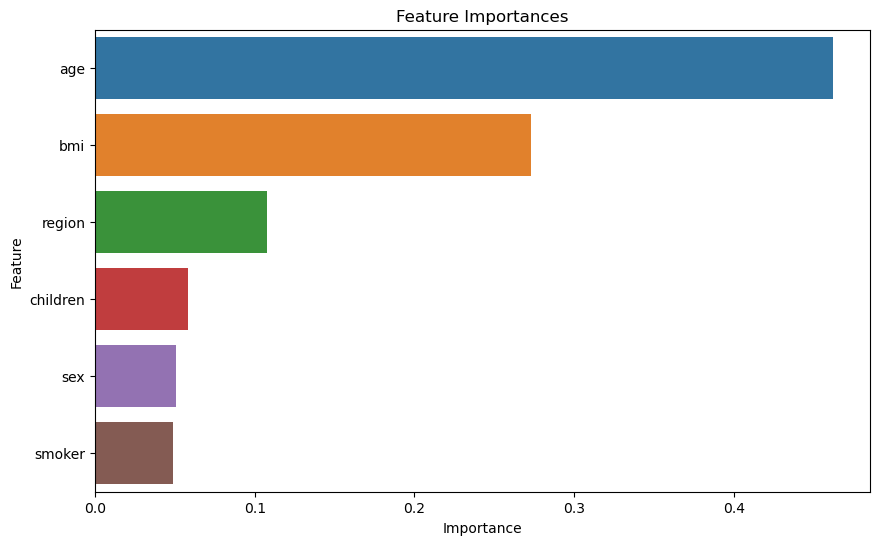

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances from the model
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


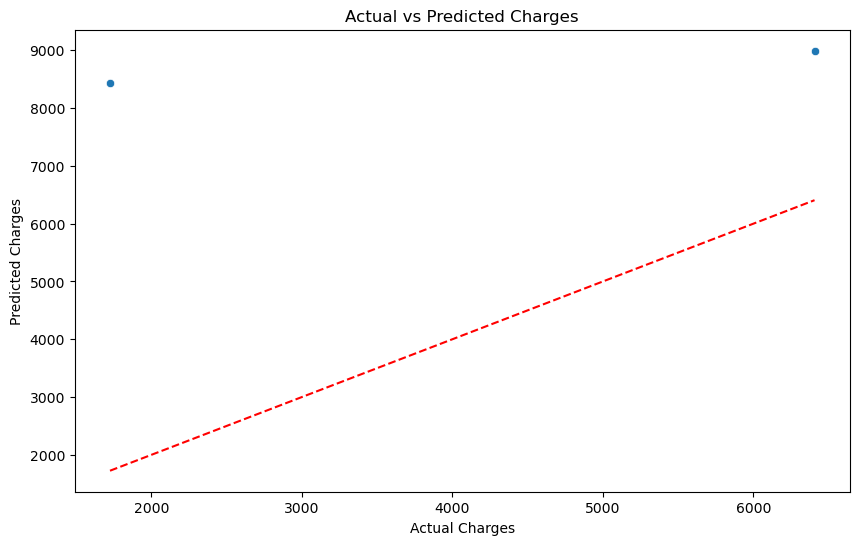

In [36]:
# Create a DataFrame for actual vs predicted charges
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.reset_index(drop=True, inplace=True)

# Plot Actual vs Predicted charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         'r--')
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


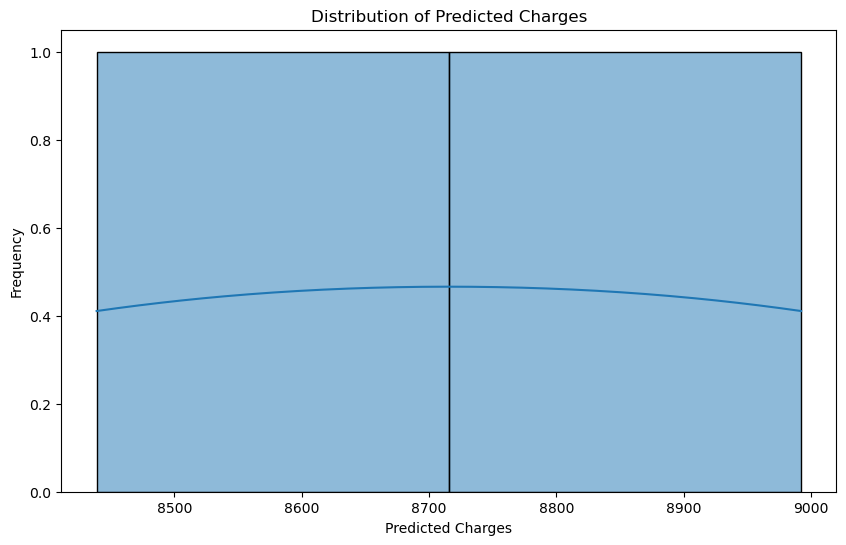

In [37]:
# Plot distribution of predicted charges
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True)
plt.title('Distribution of Predicted Charges')
plt.xlabel('Predicted Charges')
plt.ylabel('Frequency')
plt.show()
